# Sentiment analysis on amazon food reviews

importing libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [64]:
# Loading the dataset
df = pd.read_csv("Reviews.csv")

In [65]:
df.shape

(568454, 10)

In [66]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [67]:
# Renaming the score column to Rating and text column to review
df.rename(columns={"Text":"Review"},inplace=True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [68]:
# unique ratings
df["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

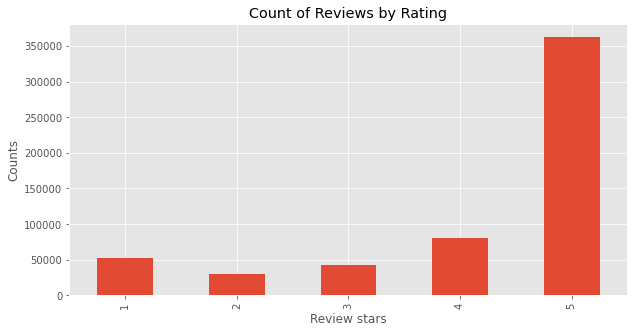

In [69]:
ax = df['Score'].value_counts().sort_index().plot(
         kind='bar',
         title="Count of Reviews by Rating",
         figsize=(10,5))
ax.set_xlabel("Review stars")
ax.set_ylabel("Counts")
# ax.set_ylabel=("Count")
plt.show()

since the above dataset is not balanced.so,we are going to take balanced dataset from df containing 1000 reviews of each Rating

In [70]:
rating_denominations = df['Score'].unique()
rating_denominations

array([5, 1, 4, 2, 3], dtype=int64)

In [71]:
dataset = []
for denomination in rating_denominations:
    filtered_data = df[df['Score'] == denomination]
    data = filtered_data[:2500]
    dataset.extend(data.values.tolist())
#     if len(dataset) >= 1000:
#         break
        
dataset = pd.DataFrame(dataset,columns = df.columns)
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
2,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
3,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
4,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...


In [72]:
dataset.shape

(12500, 10)

In [73]:
dataset = dataset[dataset["Score"]!=3]

In [74]:
dataset["Score"].value_counts()

5    2500
1    2500
4    2500
2    2500
Name: Score, dtype: int64

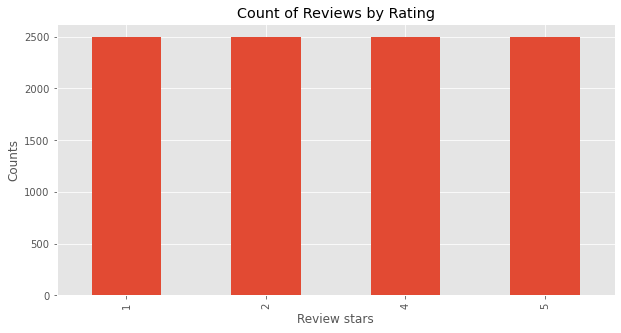

In [75]:
bx = dataset['Score'].value_counts().sort_index().plot(
         kind='bar',
         title="Count of Reviews by Rating",
         figsize=(10,5))
bx.set_xlabel("Review stars")
bx.set_ylabel("Counts")
# ax.set_ylabel=("Count")
plt.show()

In [76]:
dataset["Rating"] = np.where(dataset["Score"] > 3, 1, 0)

In [77]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Review,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
2,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1
3,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1
4,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1


In [78]:
dataset.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Review                    0
Rating                    0
dtype: int64

In [79]:
# from sklearn.utils import shuffle
# dataset = shuffle(dataset)
# dataset.head()

In [80]:
dataset['Rating'].value_counts()

1    5000
0    5000
Name: Rating, dtype: int64

Basic NLTK

In [81]:
#3,5,15
example = dataset['Review'][22]
example

'This offer is a great price and a great taste, thanks Amazon for selling this product.<br /><br />Staral'

In [82]:
# removing special char and numbers
import re
cleaned_text = re.sub('[^A-Za-z ]+', '', example)
print(cleaned_text)

This offer is a great price and a great taste thanks Amazon for selling this productbr br Staral


In [83]:
# tokenizing the text
import nltk
from nltk import word_tokenize
tokenized = word_tokenize(cleaned_text)
print(tokenized)

['This', 'offer', 'is', 'a', 'great', 'price', 'and', 'a', 'great', 'taste', 'thanks', 'Amazon', 'for', 'selling', 'this', 'productbr', 'br', 'Staral']


In [84]:
# using stopwords module from corpus library
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'weren', 'as', "don't", 'under', 'am', 'm', 'further', 'd', 're', 'where', "didn't", 'here', 'didn', 'himself', 'wasn', 'above', 'be', 'its', 'me', 'out', 'our', 'very', 'mightn', 'up', "doesn't", 'mustn', 'to', 'your', 'herself', 'then', 'most', 'too', 'doing', 'this', 'both', 'was', "won't", 'nor', 'my', 'all', 'how', 'through', 'does', 'him', 'who', 'needn', 'only', 'than', "you're", 'her', 'just', 'doesn', 'once', 'there', 'ourselves', 'they', "weren't", 'been', 'we', 'after', 'what', "mightn't", 'itself', 'have', 'she', 'shan', 'i', 'other', 'themselves', "she's", 'are', 'some', 'below', 've', 'from', 'few', 'an', 'o', "you'd", "shan't", 'couldn', 'you', 'about', 'because', 'off', 'for', 'the', 'he', 'more', 'so', 'hadn', 'y', 'each', 'same', 'over', 'on', 'by', "you'll", 'no', 't', 'at', 'again', 'll', 'did', 'or', 'which', 'will', "couldn't", 'has', 'during', 'those', 'being', 'any', 'such', 'now', 'do', 'yourselves', "isn't", 'having', 'why', "should've", 'it', 'own', 'ain', '

In [85]:
# Removing stop words from text
tokens =[]
for word in tokenized:
    if word not in stop_words:
        tokens.append(word)
print(tokens)

['This', 'offer', 'great', 'price', 'great', 'taste', 'thanks', 'Amazon', 'selling', 'productbr', 'br', 'Staral']


In [86]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized_tokens)

['This', 'offer', 'great', 'price', 'great', 'taste', 'thanks', 'Amazon', 'selling', 'productbr', 'br', 'Staral']


In [87]:
final_text = " ".join(lemmatized_tokens)
print(final_text)

This offer great price great taste thanks Amazon selling productbr br Staral


Applying all the above to the entire dataset

In [88]:
# for i in range(0,len(dataset.index)):
#     raw_text = dataset.Review[i]
#     cleaned_text = re.sub('[^A-Za-z ]+', '', raw_text)
#     tokenized = word_tokenize(cleaned_text)
#     tokens =[]
#     for word in tokenized:
#         if word not in stop_words:
#             tokens.append(word)
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
#     final_text = " ".join(lemmatized_tokens)
#     print(final_text)
#     dataset['Review'] = dataset['Review'].replace(dataset.Review[i],final_text)
    

In [89]:
# utility function for preprocessing the text
import spacy
# load the english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)

In [90]:
dataset["Review"] = dataset["Review"].apply(preprocess)

In [91]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Review,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,buy Vitality can dog food product find good qu...,1
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yumm...,1
2,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,saltwater taffy great flavor soft chewy cand...,1
3,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",taffy good soft chewy flavor amazing def...,1
4,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right sprout cat eat grass love rotate Wheatgr...,1


In [93]:
dataset["Review"][3]

'taffy good   soft chewy   flavor amazing   definitely recommend buy   satisfying'

# Training

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset['Review'],dataset['Rating'],test_size=0.2)

In [95]:
y_train.value_counts()

0    4009
1    3991
Name: Rating, dtype: int64

In [96]:
y_test.value_counts()

1    1009
0     991
Name: Rating, dtype: int64

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer().fit(x_train)

In [98]:
len(vect.get_feature_names())

14787

In [99]:
x_train_vectorized = vect.transform(x_train)

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear",multi_class="ovr")
lr.fit(x_train_vectorized,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_vectorized, y_train)

KNeighborsClassifier()

In [102]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_vectorized.toarray(), y_train)

GaussianNB()

In [103]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train_vectorized, y_train)

SVC()

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_vectorized, y_train)

DecisionTreeClassifier()

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "entropy")
rf.fit(x_train_vectorized, y_train)

RandomForestClassifier(criterion='entropy')

# Making predictions

In [106]:
x_test_vectorized = vect.transform(x_test)

In [107]:
lr_pred = lr.predict(x_test_vectorized)
knn_pred = knn.predict(x_test_vectorized)
nb_pred = nb.predict(x_test_vectorized.toarray())
sv_pred = sv.predict(x_test_vectorized)
dt_pred = dt.predict(x_test_vectorized)
rf_pred = rf.predict(x_test_vectorized)

# Model Evaluation

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
# train score and test score of Logistic Regression
print("Train Accuracy of Logistic Regression", lr.score(x_train_vectorized, y_train)*100)
print("Accuracy score of Logistic Regression",accuracy_score(y_test, lr_pred)*100)

Train Accuracy of Logistic Regression 90.8875
Accuracy score of Logistic Regression 85.65


In [110]:
# train score and test score of KNN
print("Train Accuracy of KNN", knn.score(x_train_vectorized, y_train)*100)
print("Accuracy score of KNN",accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 81.4625
Accuracy score of KNN 68.0


In [111]:
# train score and test score of Naive-Bayes
print("Train Accuracy of Naive Bayes", nb.score(x_train_vectorized.toarray(), y_train)*100)
print("Accuracy score of Naive Bayes",accuracy_score(y_test, nb_pred)*100)

Train Accuracy of Naive Bayes 86.6125
Accuracy score of Naive Bayes 63.5


In [112]:
# train score and test score of SVM
print("Train Accuracy of SVM", sv.score(x_train_vectorized, y_train)*100)
print("Accuracy score of SVM",accuracy_score(y_test, sv_pred)*100)

Train Accuracy of SVM 98.88749999999999
Accuracy score of SVM 86.4


In [113]:
# train score and test score of Decision Tree
print("Train Accuracy of Decision Tree", dt.score(x_train_vectorized, y_train)*100)
print("Accuracy score of Decision Tree",accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Decision Tree 100.0
Accuracy score of Decision Tree 71.2


In [114]:
# train score and test score of Random Forest
print("Train Accuracy of Random Forest", rf.score(x_train_vectorized, y_train)*100)
print("Accuracy score of Random Forest",accuracy_score(y_test, rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy score of Random Forest 83.55


# Extra

In [115]:
predictions = lr.predict(vect.transform(x_test))

In [116]:
from sklearn.metrics import roc_auc_score
print("AUC", roc_auc_score(y_test, predictions))

AUC 0.8565738824844813


In [117]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()

In [118]:
print("smallest coefficient",  feature_names[sorted_coef_index[:10]])

smallest coefficient ['disappointed' 'bad' 'weak' 'toy' 'throw' 'return' 'disappointing'
 'waste' 'terrible' 'taste']


In [119]:
print("Largest coefficient",  feature_names[sorted_coef_index[-11:-1]])

Largest coefficient ['enjoy' 'tasty' 'snack' 'excellent' 'favorite' 'perfect' 'nice'
 'delicious' 'love' 'great']


# Prediction

In [120]:
input_data = ("The food was tasty, and the service was best")

data = [input_data]
std_data = vect.transform(data)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Negative Rating')
else:
  print('Positive Rating')

[1]
Positive Rating


In [126]:
input_data = ("hotel service is rediculous")

data = [input_data]
std_data = vect.transform(data)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Negative Rating')
else:
  print('Positive Rating')

[0]
Negative Rating
